In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
folder = 'D:/Data_Analyst_Projet/Projet 9/Cours/Cours analyse exploratoire des données/'

## Import

In [8]:
bag_of_words = pd.read_csv(folder+'bag_of_words.csv')
mystery = pd.read_csv(folder+'mystery.csv')
cours = pd.read_csv(folder+'my_courses.csv', index_col=0)
cours_info = pd.read_csv(folder+'courses_info.csv')

In [4]:
# mot présent dans chaque cours
bag_of_words.head()

,titre,aaaa,abandonner,abattement,abbr,abc,abondement,abonnement,abonner,abonnés,...,évoqué,évoquées,évoqués,évènement,évènements,événement,événements,êtres,œil,œuvre
0,Concevez des architectures Big Data,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000469,0.000000,0.000000,0.000000
1,Apprenez à coder avec JavaScript,0.000000,0.0,0.0,0.0,0.000499,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0001,0.0,0.000000,0.000000,0.000000,0.000000
2,Concevez votre site web avec PHP et MySQL,0.000524,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000087,0.000000
3,Réussir sa campagne d'e-mailing avec MailChimp,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.020408,0.020408,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000
4,Utilisez des modèles supervisés non linéaires,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000325,0.000000,0.000651


In [20]:
bag_of_words.shape

(105, 9344)

In [11]:
# cours présent dans chaque parcours
cours_info.head()

,title,charge-e-de-gestion-des-ressources-humaines,manager-rh,gestionnaire-de-paie,data-architect,developpeur-se-dapplication-python,developpeur-web-junior,community-manager,responsable-marketing-operationnel,developpeur-se-d-application-php-symfony,data-scientist,expert-e-en-strategie-marketing-et-communication,data-analyst,theme
0,Apprenez à gérer les conflits,True,True,True,False,False,False,False,False,False,False,False,False,RH
1,Réalisez des calculs distribués sur des donnée...,False,False,False,True,False,False,False,False,False,False,False,False,data
2,Managez une équipe au quotidien,False,True,False,False,False,False,False,False,False,False,False,False,RH
3,Gérez votre code avec Git et GitHub,False,False,False,False,True,True,False,False,False,False,False,False,dev
4,Lancez une campagne de publicité avec Google A...,False,False,False,False,False,False,True,True,False,False,False,False,marketing


In [15]:
df

,title,theme
0,Apprenez à gérer les conflits,RH
1,Réalisez des calculs distribués sur des donnée...,data
2,Managez une équipe au quotidien,RH
3,Gérez votre code avec Git et GitHub,dev
4,Lancez une campagne de publicité avec Google A...,marketing
...,...,...
107,Initiez-vous à l'algèbre relationnelle avec le...,data
108,Gérez la performance de vos collaborateurs,RH
109,"""Handicap et entreprise"": intégrez durablement...",RH
110,Animez une communauté Facebook,RH & marketing


## Préparation

In [16]:
# jointure
data = cours_info[['title', 'theme']]

df = bag_of_words.merge(df, left_on='titre', right_on='title')

In [22]:
df.head()

,titre,aaaa,abandonner,abattement,abbr,abc,abondement,abonnement,abonner,abonnés,...,évoqués,évènement,évènements,événement,événements,êtres,œil,œuvre,title_y,theme_y
0,Concevez des architectures Big Data,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0000,0.0,0.000469,0.000000,0.000000,0.000000,Concevez des architectures Big Data,data
1,Apprenez à coder avec JavaScript,0.000000,0.0,0.0,0.0,0.000499,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0001,0.0,0.000000,0.000000,0.000000,0.000000,Apprenez à coder avec JavaScript,dev
2,Concevez votre site web avec PHP et MySQL,0.000524,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000087,0.000000,Concevez votre site web avec PHP et MySQL,dev
3,Réussir sa campagne d'e-mailing avec MailChimp,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.020408,0.020408,...,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,Réussir sa campagne d'e-mailing avec MailChimp,marketing
4,Utilisez des modèles supervisés non linéaires,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0000,0.0,0.000000,0.000325,0.000000,0.000651,Utilisez des modèles supervisés non linéaires,data


In [49]:
themes = df.theme_y.values
themes

array(['data', 'dev', 'dev', 'marketing', 'data', 'RH & marketing',
       'data', 'dev', 'data', 'dev', 'data', 'multi-parcours', 'data',
       'RH & marketing', 'data', 'marketing', 'dev', 'marketing',
       'multi-parcours', 'dev', 'dev', 'data', 'marketing', 'dev',
       'marketing', 'RH', 'multi-parcours', 'dev', 'dev', 'dev', 'dev',
       'RH', 'marketing', 'RH', 'RH', 'RH', 'data', 'RH', 'data', 'dev',
       'RH', 'RH & marketing', 'RH & marketing', 'multi-parcours', 'dev',
       'RH & marketing', 'dev', 'marketing', 'RH', 'RH', 'marketing',
       'RH & marketing', 'multi-parcours', 'marketing', 'RH', 'RH',
       'RH & marketing', 'marketing', 'data', 'RH & marketing', 'dev',
       'data', 'multi-parcours', 'RH', 'RH & marketing', 'dev', 'RH',
       'data', 'multi-parcours', 'marketing', 'data', 'dev', 'dev', 'RH',
       'data', 'data', 'dev', 'marketing', 'dev', 'dev', 'RH', 'RH',
       'marketing', 'data', 'data', 'dev', 'RH', 'dev', 'multi-parcours',
       'marke

In [25]:
names = df.title_y.values
names

array(['Concevez des architectures Big Data',
       'Apprenez à coder avec JavaScript',
       'Concevez votre site web avec PHP et MySQL',
       "Réussir sa campagne d'e-mailing avec MailChimp",
       'Utilisez des modèles supervisés non linéaires',
       'Animez une communauté Facebook',
       'Classez et segmentez des données visuelles',
       'Gérez votre projet informatique facilement !',
       'Créez votre Data Lake',
       'Découvrez le fonctionnement des algorithmes',
       'Initiez-vous au machine learning', 'Apprenez à apprendre',
       'Modélisez vos données avec les méthodes ensemblistes',
       'Initiez-vous à la gestion de projet agile',
       'Découvrez les librairies Python pour la Data Science',
       'Comprenez votre audience avec Google Analytics',
       'Découper et intégrer une maquette',
       'Réussissez vos campagnes de marketing mobile',
       'Gérez un projet digital avec une méthodologie en cascade',
       'Découvrez la programmation orientée

In [27]:
col_info = ['titre', 'title_y', 'theme_y']

In [30]:
# colonne numeriques dans un array
X = df.drop(columns=col_info).values

In [35]:
# on standardise

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## Clustering

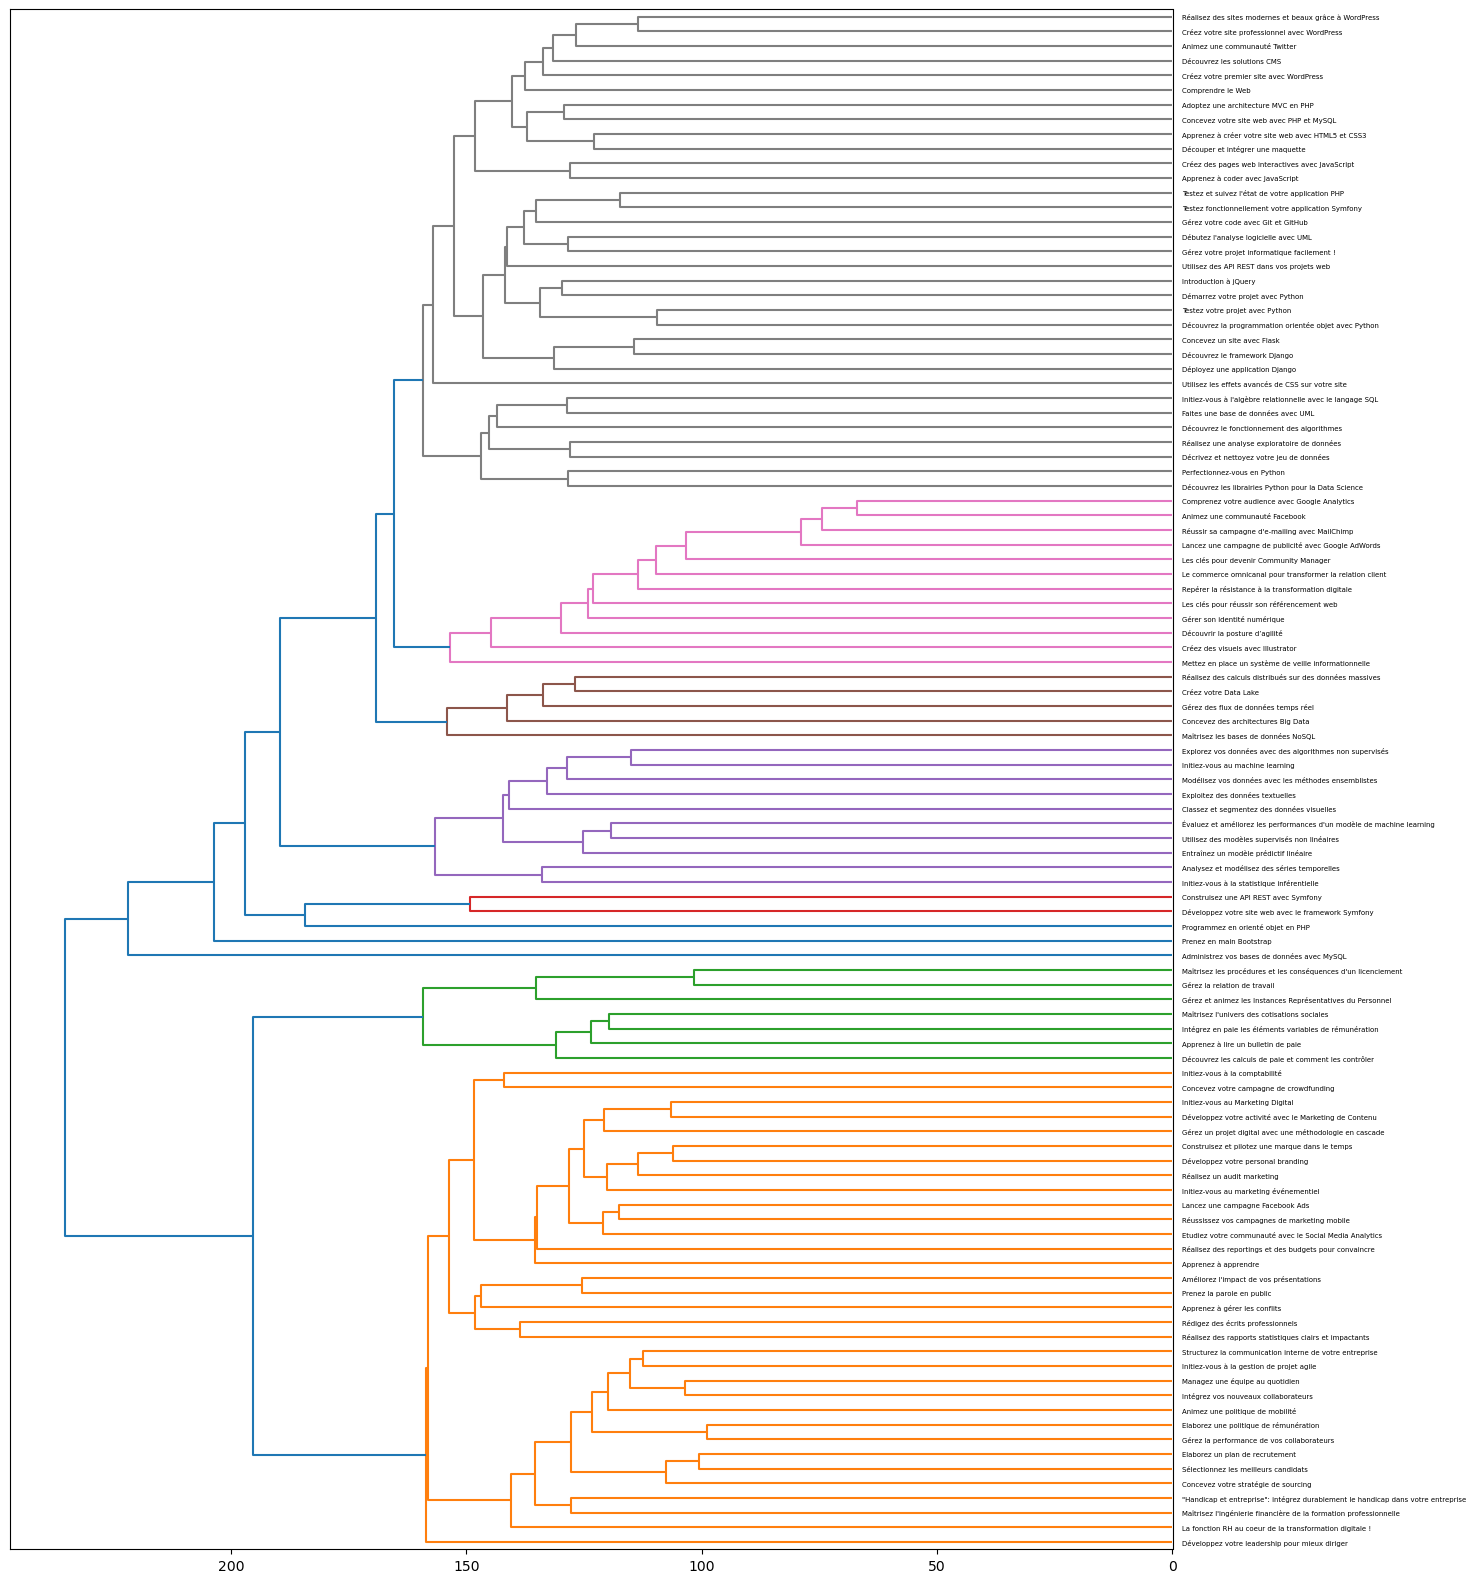

In [45]:
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(15,20))

dendrogram(Z, p=X_scaled.shape[0], truncate_mode='lastp', orientation='left', labels=names);

In [50]:
cah = AgglomerativeClustering(n_clusters=12, linkage='ward')

cah.fit(X_scaled)

AgglomerativeClustering(n_clusters=12)

In [55]:
clusters = cah.labels_

## Analyse

In [56]:
crosstab = pd.crosstab(themes, clusters, dropna=False)
crosstab.rename_axis(columns="cluster", index="theme", inplace=True)
crosstab

cluster,0,1,2,3,4,5,6,7,8,9,10,11
theme,,,,,,,,,,,,
RH,14,0,0,3,2,0,0,0,0,0,4,0
RH & marketing,6,0,1,0,3,0,0,0,0,0,0,0
data,1,5,0,0,0,4,10,0,0,0,0,0
dev,0,0,18,0,0,3,0,1,1,2,0,1
marketing,10,0,2,0,6,0,0,0,0,0,0,0
multi-parcours,2,0,5,0,1,0,0,0,0,0,0,0
